In [37]:
import pandas as pd
import plotly.graph_objects as go
import psycopg2

# Conectar al servidor PostgreSQL
conn = psycopg2.connect(
    dbname="data_bank",
    user="user",
    password="password",
    host="localhost",
    port="5432"
)

# Ejecutar la consulta SQL y almacenar los resultados en un data frame
query = """
SELECT
    product,
    count
FROM
    complaints_per_product
ORDER BY
    count DESC;
"""
df = pd.read_sql_query(query, conn)

# Crear la figura para la gráfica de dispersión
fig = go.Figure(go.Scatter(
    x=df['product'],
    y=df['count'],
    mode='markers',
    marker=dict(
        size=12,
        color=df['count'],  # Utilizar la cantidad como variable para el color
        colorscale='Viridis',  # Puedes cambiar el mapa de colores según tus preferencias
        colorbar=dict(title='Cantidad')
    )
))

# Establecer el título y las etiquetas de los ejes de la gráfica
fig.update_layout(
    title='Distribución de cuentas por tipo de servicio',
    xaxis_title='Tipo de servicio',
    yaxis_title='Número de quejas'
)

# Mostrar la gráfica
fig.show()

# Cerrar la conexión a la base de datos
conn.close()


/tmp/ipykernel_3553/3776180778.py:24: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



/tmp/ipykernel_3553/1474096691.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



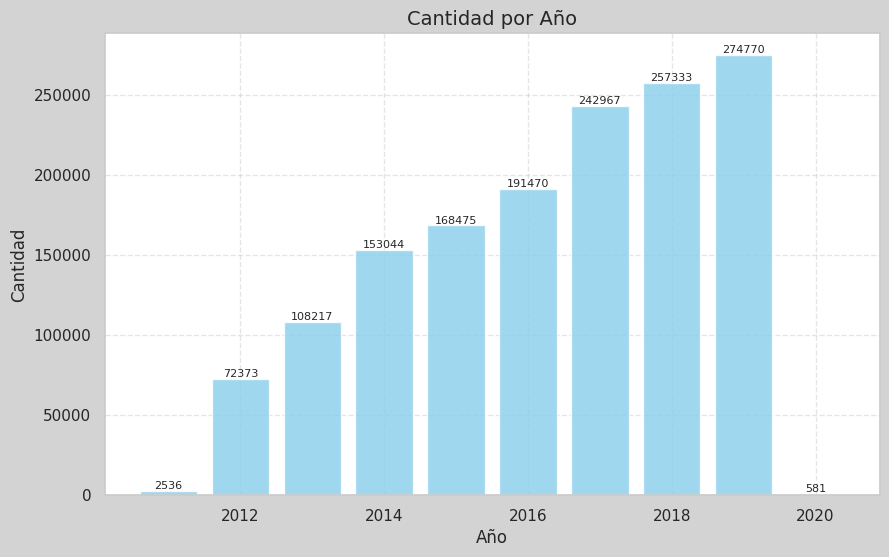

In [39]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos PostgreSQL (asegúrate de ajustar los parámetros)
conn = psycopg2.connect(
    host="localhost",
    database="data_bank",
    user="user",
    password="password"
)

# Nombre de la tabla en PostgreSQL
table_name = "complaints_per_year"

# Consulta SQL para obtener los datos
query = f"SELECT * FROM {table_name}"

# Leer datos desde PostgreSQL a un DataFrame
df = pd.read_sql_query(query, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Crear un gráfico de barras 2D
plt.figure(figsize=(10, 6), facecolor='lightgrey')  # Color de fondo
plt.bar(df['product'], df['count'], color='skyblue', alpha=0.8)

# Configurar etiquetas de ejes y título
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Cantidad por Año', fontsize=14)

# Agregar etiquetas a cada barra
for i, txt in enumerate(df['count']):
    plt.text(df['product'][i], txt, str(txt), ha='center', va='bottom', fontsize=8)

# Agregar rejilla
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()



/tmp/ipykernel_3553/230656748.py:21: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



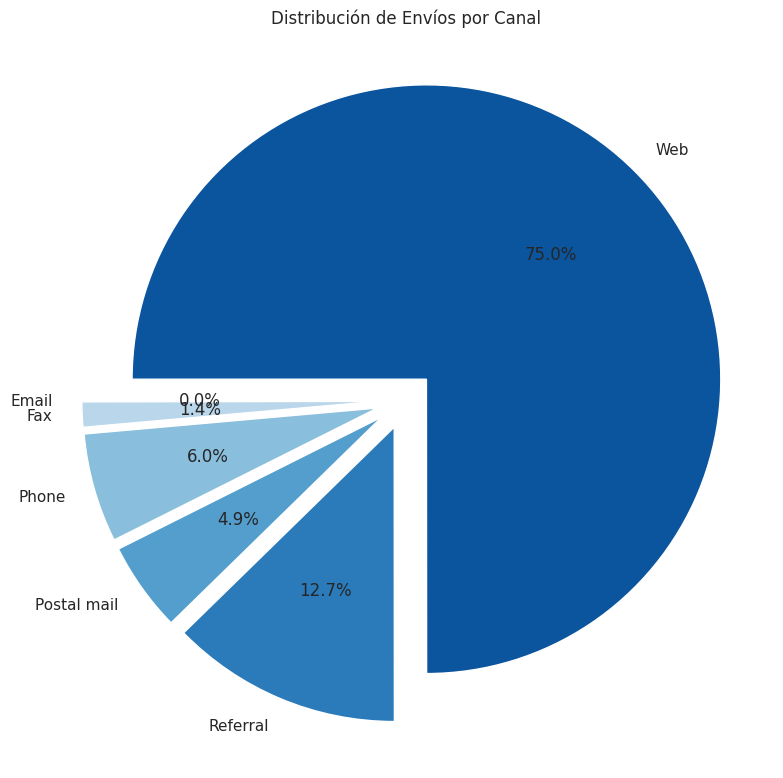

In [40]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn proporciona paletas de colores seguros

# Conectar a la base de datos PostgreSQL (ajusta los parámetros según tu configuración)
conn = psycopg2.connect(
    host="localhost",
    database="data_bank",
    user="user",
    password="password"
)

# Nombre de la tabla en PostgreSQL
table_name = "complaints_per_channel"

# Consulta SQL para obtener los datos
query = f"SELECT * FROM {table_name}"

# Leer datos desde PostgreSQL a un DataFrame
df = pd.read_sql_query(query, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Seleccionar una paleta de colores seguros de Seaborn
#colores_seguros = sns.color_palette("Paired", len(df['submitted_via']))
colores_seguros = sns.color_palette("Blues", len(df['channel']))
#sns.color_palette("Blues", as_cmap=True)

# Crear un gráfico de pie con ajustes y colores seguros
plt.figure(figsize=(8, 8))
plt.pie(df['count'], labels=df['channel'], autopct='%1.1f%%', startangle=180, colors=colores_seguros, explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

# Agregar título
plt.title('Distribución de Envíos por Canal')

# Ajustar el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/tmp/ipykernel_3553/212976695.py:17: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



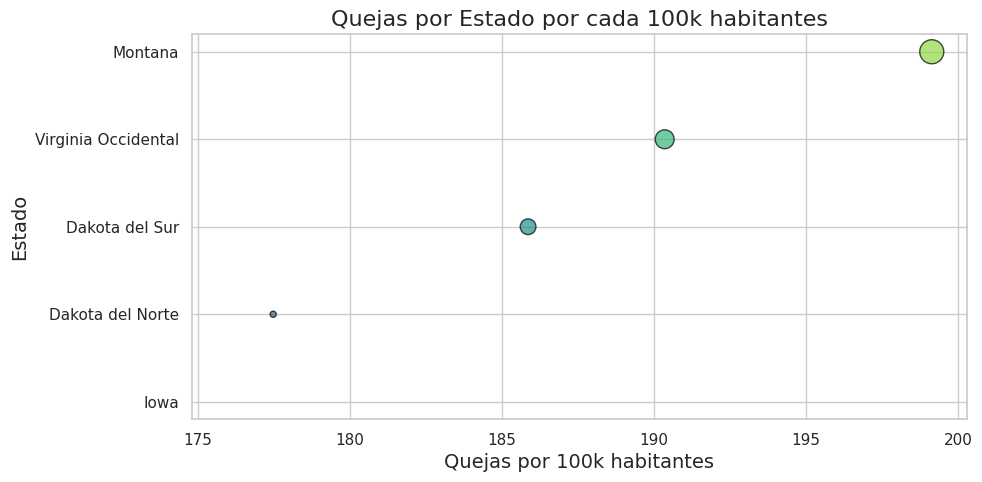

In [41]:
import pandas as pd
import psycopg2
from matplotlib import pyplot as plt
import seaborn as sns

# Establecer conexión con la base de datos
try:
    conn = psycopg2.connect(
        dbname="data_bank",
        user="user",
        password="password",
        host="localhost",
        port="5432"
    )

    # Consultar la información de las quejas
    df = pd.read_sql_query("SELECT full_name, complaints_per_100k FROM complaints_per_100k_state ORDER BY complaints_per_100k LIMIT 5", conn)

    # Convertir la columna 'complaints_per_100k' a tipo numérico
    df['complaints_per_100k'] = pd.to_numeric(df['complaints_per_100k'], errors='coerce')

    # Normalizar los tamaños para que estén en un rango apropiado
    sizes = (df['complaints_per_100k'] - df['complaints_per_100k'].min()) / (df['complaints_per_100k'].max() - df['complaints_per_100k'].min())
    sizes = sizes * 300  # Ajusta el factor multiplicativo según el rango de tamaños deseado

    # Crear el gráfico de burbujas con colores y tamaños personalizados
    plt.figure(figsize=(10, 5))
    colores = sns.color_palette("viridis", len(df))  # Cambia el nombre del color según tu preferencia
    plt.scatter(df['complaints_per_100k'], df['full_name'], c=colores, s=sizes, alpha=0.7, edgecolors='black', linewidth=1)
    
    # Añadir etiquetas y título
    plt.title('Quejas por Estado por cada 100k habitantes', fontsize=16)
    plt.xlabel('Quejas por 100k habitantes', fontsize=14)
    plt.ylabel('Estado', fontsize=14)
    
    plt.show()

except (Exception, psycopg2.Error) as error:
    print("Error:", error)

finally:
    # Cerrar la conexión
    if conn:
        conn.close()


/tmp/ipykernel_3553/4107464515.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



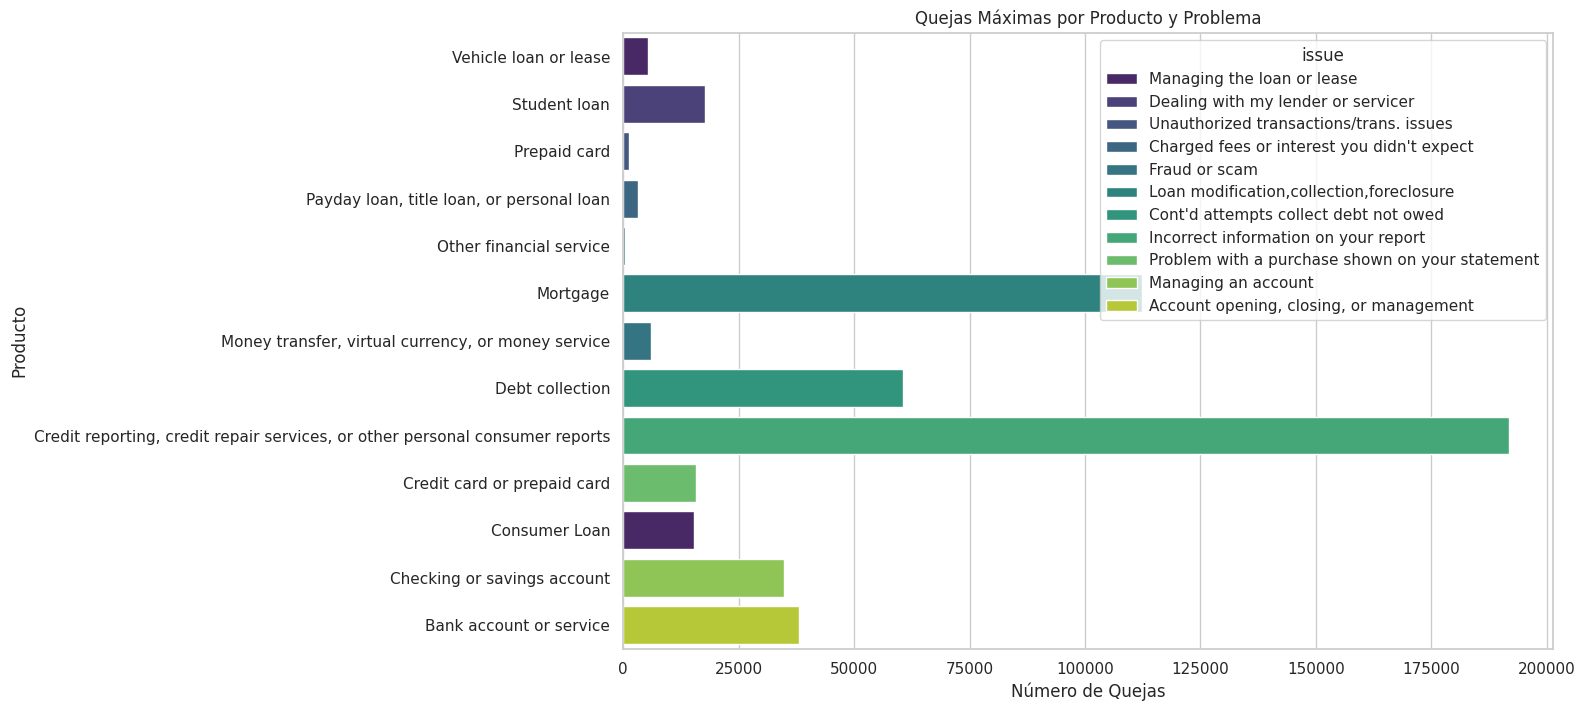

In [42]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer conexión con la base de datos
try:
    conn = psycopg2.connect(
        dbname="data_bank",
        user="user",
        password="password",
        host="localhost",
        port="5432"
    )

    # Consultar la información de la tabla
    query = "SELECT product, issue, count FROM complaints_max_per_product_issue;"
    df = pd.read_sql_query(query, conn)

    # Cerrar la conexión a la base de datos
    conn.close()

    # Crear un gráfico de barras utilizando Seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(x="count", y="product", hue="issue", data=df, palette="viridis")
    
    # Añadir etiquetas y título al gráfico
    plt.xlabel('Número de Quejas')
    plt.ylabel('Producto')
    plt.title('Quejas Máximas por Producto y Problema')
    
    # Mostrar el gráfico
    plt.show()

except (Exception, psycopg2.Error) as error:
    print("Error:", error)
